# Global variation in submarine channel sinuosity

The purpose of this notebook is to quantitatively estimate the relationship between submarine channel sinuosity, valley slope & latitude.

The initial notebook and its associated dataset has been shared by Sylvester, Z. ([blog](http://hinderedsettling.com)). To get an understanding of the original idea behind it, have a look at the paper from Peakall et al. (2011) and then at the comment from Sylvester et al. (2013).

<small>
*Refs:*<br/>
Peakall, J., Kane, I. A., Masson, D. G., Keevil, G., McCaffrey, W., & Corney, R. (2011). Global (latitudinal) variation in submarine channel sinuosity. Geology, 40(1), 11–14. [doi:10.1130/G32295.1](http://dx.doi.org/doi:10.1130/G32295.1).<br/>
Sylvester, Z., Pirmez, C., Cantelli, A., & Jobe, Z. R. (2013). Global (latitudinal) variation in submarine channel sinuosity: COMMENT. Geology, 41(5), e287–e287. [doi:10.1130/G33548C.1](http://dx.doi.org/10.1130/G33548C.1).<br/>
Peakall, J., Wells, M. G., Cossu, R., Kane, I. A., Masson, D. G., Keevil, G. M., et al. (2013). Global (latitudinal) variation in submarine channel sinuosity: REPLY. Geology, 41(5), e288–e288. [doi:10.1130/G34319Y.1](http://dx.doi.org/doi:10.1130/G34319Y.1).
</small>

## Sylvester et al. dataset

First we import the libraries and modules we will be using in this notebook...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
%matplotlib inline

The majority of the data comes from the book by Clark and Pickering (1996), which also forms the basis of the analysis by Peakall et al. (2011); graphs in the book were digitized using Graphclick. Data for the Amazon Channel comes from Pirmez and Flood (1995) (provided by Carlos Pirmez); and Popescu et al. (2001) (centerline digitized from map in paper and half-wavelength sinuosities calculated from centerline). See full references in paper.

The dataset is available via dropbox:

In [2]:
fileurl = 'https://dl.dropboxusercontent.com/u/25694950/channel_sinuosities.csv'
data = pd.read_csv(fileurl)

Let's have a look at the first 5 lines of the data table:

In [3]:
data[:5]

,Name,Slope,Sinuosity,Latitude,Large_river
0,DeSoto,0.00148,1.24586,28,0
1,DeSoto,0.00228,1.31765,28,0
2,DeSoto,0.00181,2.04757,28,0
3,DeSoto,0.00187,2.00569,28,0
4,DeSoto,0.00251,2.23903,28,0


A bar graph of data point counts for each system shows that the Amazon Channel has by far the largest number of values:

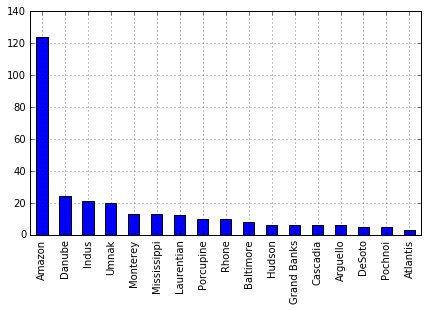

In [4]:
plt.figure(figsize=(7,4))
data['Name'].value_counts().plot(kind='bar');

We will also use the dataset below to visualise where the submarine channels are located on a projected map:

In [5]:
locfile = '/workspace/dataset/canyon_loc.csv'
df = pd.read_csv(locfile)
df.head()

,Name,Latitude,Longitude,LargeRiver
0,De Soto,28,-87,0
1,Arguello,33,-121,0
2,Monterey,35,-122,0
3,Atlantis,38,-70,0
4,Baltimore,38,-74,0


We  need the long/lat coordinates & the river type label for our map. The river type label <code>LargeRiver</code> is set to 0 for smaller rivers and 1 for the larger ones.

In [6]:
df_data = df[['Latitude', 'Longitude','LargeRiver']]
df_data = df_data.dropna()

And convert values to floats:

In [7]:
lons = df_data['Longitude'].astype('float32')
lats = df_data['Latitude'].astype('float32')
lrvs = df_data['LargeRiver'].astype('float32')

Now plot the map... If you execute the following script only the larger river will appear

In [8]:
map = Basemap(projection='robin',lon_0=0,resolution='c')

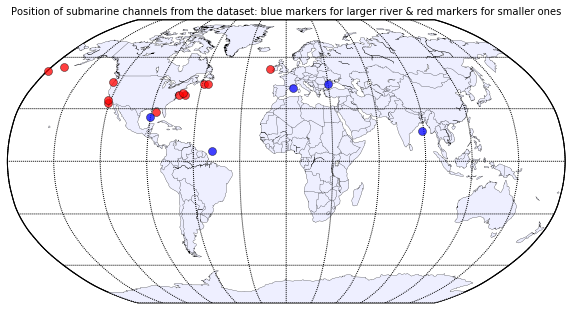

In [10]:
plt.figure(figsize=(10,8))
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)

def get_marker_color(lrv):
    if lrv < 1.0:
        return ('r')
    else:
        return ('b')

map.fillcontinents(color='#eeefff',lake_color='white')
map.drawmapboundary(fill_color='white')
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

msize = 8
for lon, lat, lrv in zip(lons, lats, lrvs):
    x,y = map(lon, lat)
    marker_string = get_marker_color(lrv)
    map.plot(x, y, markersize=msize,c=marker_string, marker='o',zorder=4,alpha=0.75)

plt.title('Position of submarine channels from the dataset: blue markers for larger river & red markers for smaller ones',fontsize=10)
plt.show()

##  Sinuosity vs valley slope

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


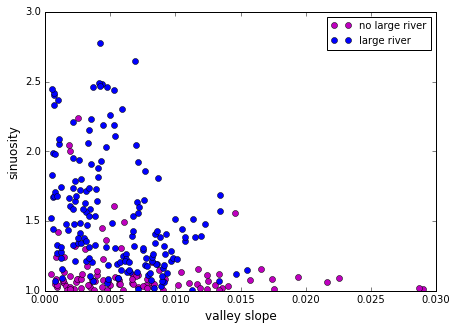

In [11]:
plt.figure(figsize=(7,5))

# Data points are colored as a function of they come 
# from systems with larger rivers or smaller rivers. 
groups = data.groupby('Large_river')
labels = ('no large river','large river')
colors = (plt.rcParams['axes.color_cycle'][4],plt.rcParams['axes.color_cycle'][0])

for name, group in groups:
    plt.plot(group.Slope, group.Sinuosity, marker='o', linestyle='', ms=6, label=labels[name], color=colors[name])
    
# Legend and axis
plt.legend(loc='best', fontsize=10)
plt.xlabel('valley slope', fontsize=12)
plt.ylabel('sinuosity', fontsize=12)
plt.axis([0.0,0.03,1.0,3.0]);

## Sinuosity versus latitude

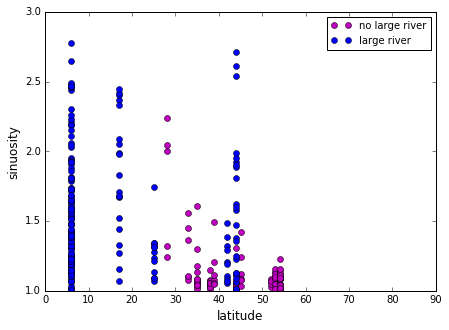

In [12]:
plt.figure(figsize=(7,5))

# Data points are colored as a function of they come 
# from systems with larger rivers or smaller rivers. 
groups = data.groupby('Large_river')
labels = ('no large river','large river')
colors = (plt.rcParams['axes.color_cycle'][4],plt.rcParams['axes.color_cycle'][0])

for name, group in groups:
    plt.plot(group.Latitude, group.Sinuosity, marker='o', linestyle='', ms=6, label=labels[name], color=colors[name])
    
# Legend and axis
plt.legend(loc='best', fontsize=10)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('sinuosity', fontsize=12)
plt.axis([0.0,90,1.0,3.0]);

## Global river discharge data

We load the dataset from [Dai and Trenberth Global River Flow and Continental Discharge Datase](http://www.cgd.ucar.edu/cas/catalog/surface/dai-runoff/index.html)

In [13]:
riverurl = 'https://dl.dropboxusercontent.com/u/107639/notebooks/amazon/rivers2.csv'
datariver = pd.read_csv(riverurl, sep='|', na_values=[' Null', '  Null'])

Let's have a look at the first lines of the river data table:

In [14]:
datariver.head()

,No,m2s_ra,lonm,latm,area(km2),Vol,nyr,yrb,yre,elev(m),CT,CN,River_Name,OCN,Station_Name
0,1,12462,-51.75,-0.75,4618750,5389.537,79.0,1928,2006,37,BR,SA,Amazon,ATL,"Obidos, Bra"
1,2,10291,12.75,-5.75,3475000,1270.203,97.1,1903,2000,270,CD,AF,Congo,ATL,"Kinshasa, C"
2,3,11474,-61.75,9.25,836000,980.088,75.8,1923,1999,-9999,VE,SA,Orinoco,ATL,Pte Angostu
3,4,10374,120.75,32.25,1705383,905.141,99.6,1900,2000,19,CN,AS,Changjiang,PAC,"Datong, Chi"
4,5,10245,89.75,24.25,554542,670.943,44.3,1956,2000,19,BD,AS,Brahmaputra,IND,Bahadurabad


In [15]:
d_river = datariver[[' lonm', 'latm',  'Vol', 'm2s_ra']]
d_river = d_river.dropna()

And convert values to floats:

In [16]:
d_river['Vol'] = d_river['Vol'].astype('float32')
d_river['lonm'] = d_river[' lonm'].astype('float32')
d_river['latm'] = d_river['latm'].astype('float32')
d_river['m2s_ra'] = d_river['m2s_ra'].astype('float32')

In [18]:
# Set the discharge formula here:
D = np.sqrt( d_river['Vol'] * d_river['m2s_ra'] / 10000  )

Now plot the map for the 50 largest rivers in the world:

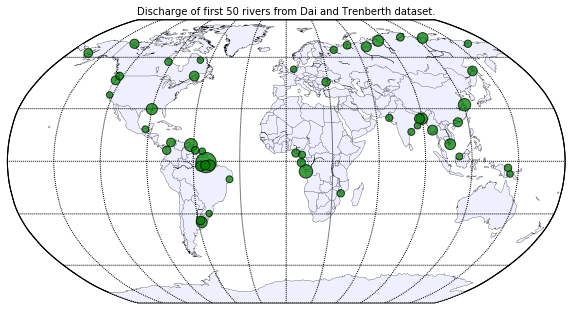

In [19]:
plt.figure(figsize=(10,8))

rivermap = Basemap(projection='robin',lon_0=0,resolution='c')
x, y = rivermap(d_river['lonm'].values[0:50], d_river['latm'].values[0:50])

rivermap.drawcoastlines(linewidth=0.25)
rivermap.drawcountries(linewidth=0.25)

rivermap.fillcontinents(color='#eeefff',lake_color='white')
rivermap.drawmapboundary(fill_color='white')
rivermap.drawmeridians(np.arange(0,360,30))
rivermap.drawparallels(np.arange(-90,90,30))

rivermap.scatter(x,y,s=D[0:50]*5,c='green',marker='o',zorder=4,alpha=0.75)
plt.title('Discharge of first 50 rivers from Dai and Trenberth dataset.',fontsize=10)